In [5]:
import numpy as np
import pandas as pd


In [6]:
df=pd.read_csv('placement.csv')

In [7]:
df.head() #we can see we need to preprocess this data and remove the column called "Unnamed:0"


,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [8]:
df.shape

(100, 4)

In [9]:
# Steps will be as follows

# 0. Preprocess + EDA + Feature Selection
# 1. Extract input and output cols
# 2. Scale the values
# 3. Train test split
# 4. Train the model
# 5. Evaluate the model/model selection
# 6. Deploy the model

In [10]:
df=df.iloc[:,1:] #removing 1st column "unnamed", dont run this again and again, itll keep dropping 1st cols

In [11]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [12]:
df.info() #we can see all rows are filled, and no null values exist, so no need to cleanup

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   cgpa       100 non-null    float64
 1   iq         100 non-null    float64
 2   placement  100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [13]:
import matplotlib.pyplot as plt


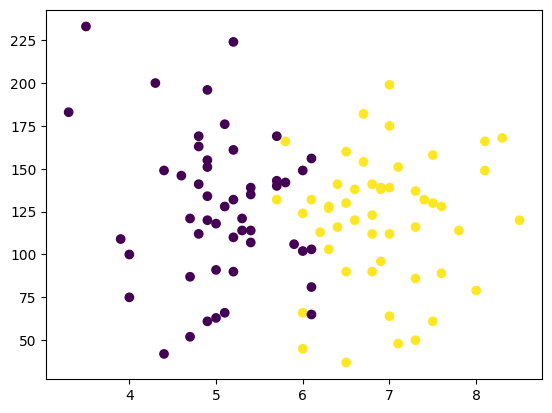

In [14]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement']) #yellow are placed and purple are unplaced

In [15]:
#we are gonna use logistic regression here as our ML model, as we can roughly see that drawing a line in between will roughly divide the dots into left and right, purple and yellow

In [16]:
#cgpa and iq are independent variables while placement is dependent variable

In [17]:
x=df.iloc[:,0:2] #separating out our ip and op columns
y=df.iloc[:,-1]

In [18]:
x

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [19]:
y

,placement
0,1
1,0
2,0
3,1
4,0
...,...
95,0
96,0
97,1
98,1


In [20]:
#now we do the train test split

In [21]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.1) #test_size takes the fraction of all datapoints that will become the testdata

In [22]:
x_train


,cgpa,iq
78,6.1,81.0
15,5.1,176.0
9,5.1,66.0
55,7.8,114.0
39,4.6,146.0
...,...,...
52,7.0,175.0
93,6.8,112.0
11,6.9,138.0
66,6.9,96.0


In [23]:
x_test

,cgpa,iq
4,5.8,142.0
84,5.7,169.0
37,8.1,149.0
46,5.3,114.0
89,4.9,151.0
31,3.9,109.0
65,8.1,166.0
6,5.7,143.0
69,8.5,120.0
92,5.2,110.0


In [24]:
y_train

,placement
78,0
15,0
9,0
55,1
39,0
...,...
52,1
93,1
11,1
66,1


In [25]:
y_test

,placement
4,0
84,0
37,1
46,0
89,0
31,0
65,1
6,0
69,1
92,0


In [26]:
#now we scale all values to between -1 to 1
#this isnt necessary but recommended

In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
scaler=StandardScaler()

In [29]:
x_train=scaler.fit_transform(x_train) #transforms all datapoints by some uniform scaling

In [30]:
x_train

array([[ 0.11290094, -1.00141882],
       [-0.80251209,  1.31580199],
       [-0.80251209, -1.36729579],
       [ 1.6691031 , -0.19648948],
       [-1.26021861,  0.58404805],
       [-0.8940534 , -1.44047118],
       [-0.80251209,  0.14499569],
       [-0.9855947 , -0.0501387 ],
       [ 1.21139658, -0.14770589],
       [-1.077136  , -0.24527308],
       [ 0.02135964, -1.36729579],
       [ 2.12680962,  1.12066761],
       [ 0.47906615,  0.92553322],
       [-0.25326427,  0.43769726],
       [-0.9855947 ,  0.29134648],
       [-1.077136  ,  0.46208906],
       [-0.16172297,  1.07188401],
       [ 0.47906615,  0.19377928],
       [-0.52788818,  0.31573827],
       [ 0.38752485, -0.14770589],
       [-0.8940534 , -0.75750084],
       [ 0.57060746,  0.38891367],
       [ 0.66214876,  1.46215278],
       [-0.07018167, -0.39162387],
       [-0.9855947 ,  1.80363795],
       [-2.26717295,  2.70613448],
       [ 0.29598355, -0.46479926],
       [-1.80946643, -0.53797466],
       [ 1.48602049,

In [31]:
x_test=scaler.transform(x_test)

In [32]:
x_test

array([[-0.16172297,  0.48648086],
       [-0.25326427,  1.14505941],
       [ 1.94372701,  0.65722345],
       [-0.61942949, -0.19648948],
       [-0.9855947 ,  0.70600704],
       [-1.90100774, -0.31844847],
       [ 1.94372701,  1.07188401],
       [-0.25326427,  0.51087266],
       [ 2.30989222, -0.0501387 ],
       [-0.71097079, -0.29405668]])

In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:
clf=LogisticRegression() #clf is an object of LogisticRegression

In [35]:
clf.fit(x_train, y_train) #fit is a function used for model training

LogisticRegression()

In [36]:
#now to evaluate model using test data
y_pred=clf.predict(x_test) #acc to the model, what should be the placement info of test data
y_pred

array([0, 0, 1, 0, 0, 0, 1, 0, 1, 0])

In [37]:
y_test #now we see what the actual placement data was for the test data points

,placement
4,0
84,0
37,1
46,0
89,0
31,0
65,1
6,0
69,1
92,0


In [38]:
#compare the 2, real vs predicted; either manually or for many datapoints, use sklearn itself

In [39]:
from sklearn.metrics import accuracy_score

In [40]:
accuracy_score(y_test, y_pred) #lets see what fraction of results are accurate

1.0

In [41]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

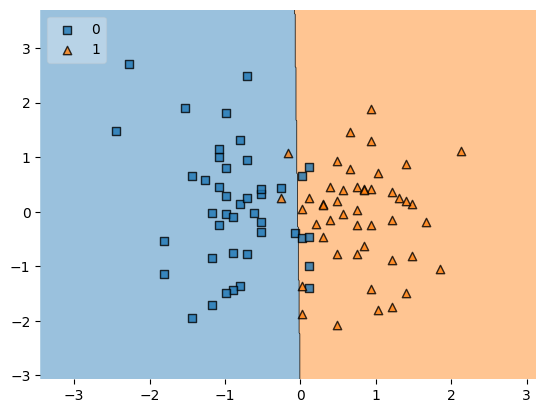

In [42]:
plot_decision_regions(x_train, y_train.values, clf=clf, legend=2)
#this func must take arrays as values, now we had already converted x_train to an array
#so we only convert y_train to array by y_train.values
#classifier(clf) name is clf only

In [43]:
import pickle

In [45]:
pickle.dump(clf, open('model.pkl', 'wb'))